In [61]:
import cv2
from pathlib import Path
from google.colab.patches import cv2_imshow
import numpy as np
from copy import deepcopy
folder_path = '/content/drive/My Drive/HundredSignatures'
images_path = Path(folder_path)

In [62]:
idcard = cv2.imread("idcard.jpg")
signatures = []
for img_path in images_path.iterdir():
    img = cv2.imread(str(img_path))
    signatures.append(img)

In [97]:
def Signatured_idcard(Signature,idcard):
  S_idcard = deepcopy(idcard)

  dimension = (100, 50) # Dimension for resized mask
  resized_signature = cv2.resize(Signature, dimension, interpolation = cv2.INTER_AREA)
  gray_signature = cv2.cvtColor(resized_signature, cv2.COLOR_BGR2GRAY)
  _, mask = cv2.threshold(gray_signature, 200, 255, cv2.THRESH_BINARY_INV)

  mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

  x, y = 365, 240 # Starting position to place the signatures
  s_height, s_width = resized_signature.shape[:2]
  roi = S_idcard[y:y+s_height, x:x+s_width] # Region of interest

  S_idcard[y:y+s_height, x:x+s_width] = np.where(mask_rgb == [255, 255, 255], 0, roi)

  return S_idcard

In [98]:
hundred_idcard = []
for i in signatures:
  x = Signatured_idcard(i,idcard)
  hundred_idcard.append(x)

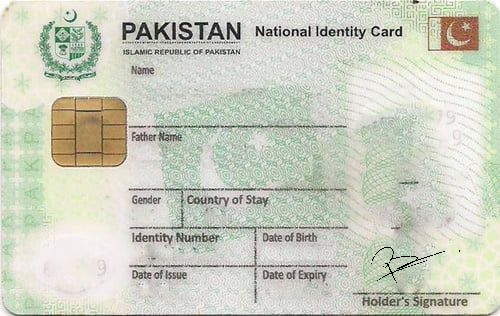

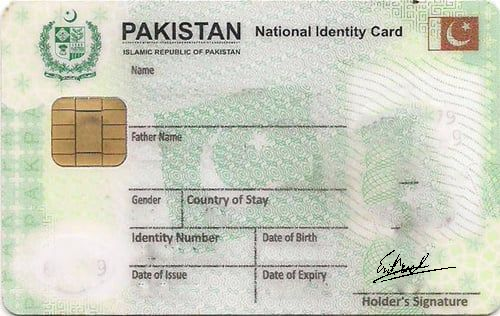

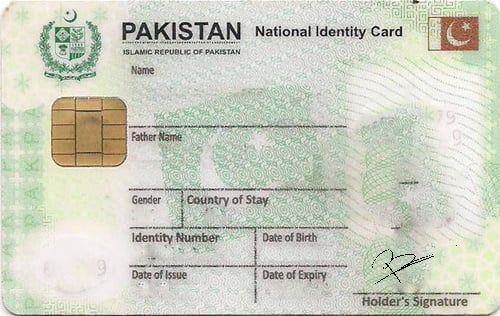

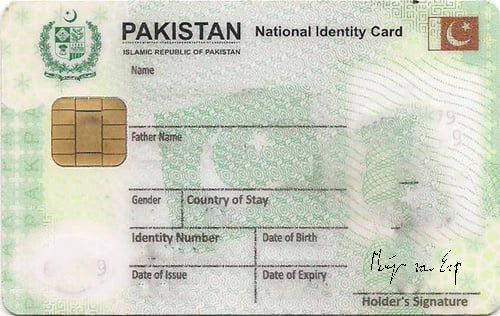

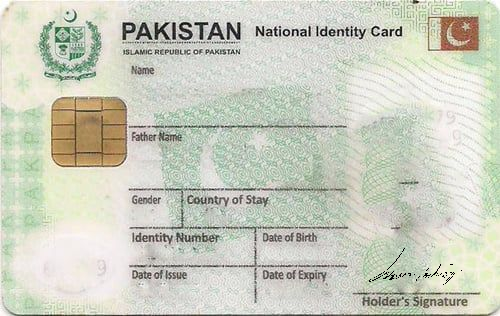

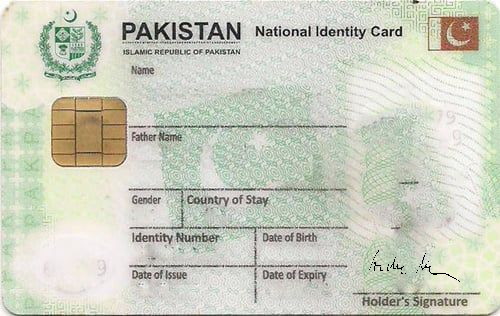

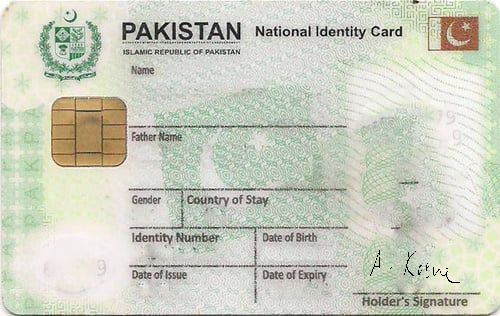

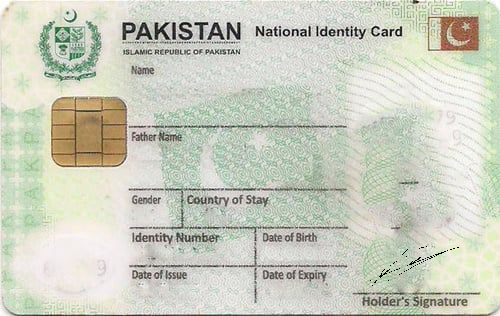

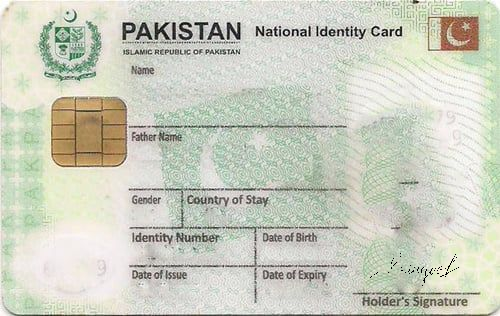

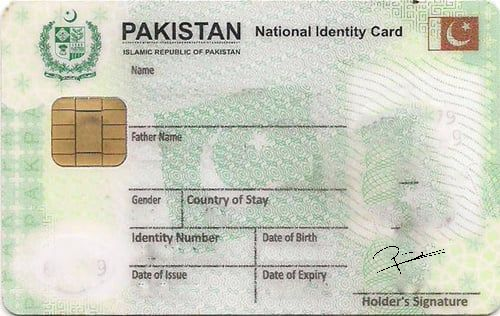

In [100]:
# Displaying just ten signatured id cards
for i in range(10):
  cv2_imshow(hundred_idcard[i])